In [1]:
%pwd

'/home/group.kurse/cviwo013/ComputerVisionProject'

In [2]:
import numpy as np
import os
from pathlib import Path
from PIL import Image
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import random
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from CellDataset import CellDataset, _reduced_list

In [3]:
dataset = CellDataset(mode='inference', video_list=_reduced_list[: int(len(_reduced_list) * 0.5)])
dataloader = DataLoader(
    dataset,
    batch_size=128,
    shuffle=False,
    num_workers=16,
    pin_memory=True,
)

gpu = 1
device = torch.device(f"cuda:{gpu}" if torch.cuda.is_available() else "cpu")

29009


In [4]:
color_avgs = []
labels = []
mean = torch.tensor([[0.485, 0.456, 0.406]])
std = torch.tensor([[0.229, 0.224, 0.225]])

for img, label in tqdm(dataloader):
    img.to(device, non_blocking=True)
    color_avg = torch.mean(img, dim=(2, 3))
    color_avg = color_avg * std + mean
    color_avgs.append(color_avg.to('cpu', non_blocking=True).numpy())
    labels.append(label.numpy())

color_avgs = np.concatenate(color_avgs, axis=0)
labels = np.concatenate(labels, axis=0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:07<00:00, 32.35it/s]


In [5]:
color_avgs

array([[0.01098767, 0.01445118, 0.00118309],
       [0.01176989, 0.01352265, 0.0012238 ],
       [0.00987118, 0.00076437, 0.01313177],
       ...,
       [0.02177942, 0.01619124, 0.00298542],
       [0.0008519 , 0.00501689, 0.00344181],
       [0.00631371, 0.00349942, 0.00996402]], dtype=float32)

In [6]:
pca = PCA(2)
reduced = pca.fit_transform(color_avgs)

In [7]:
tsne = TSNE(n_components=2, perplexity=30, n_jobs=16, metric='euclidean')
reduced = tsne.fit_transform(reduced)

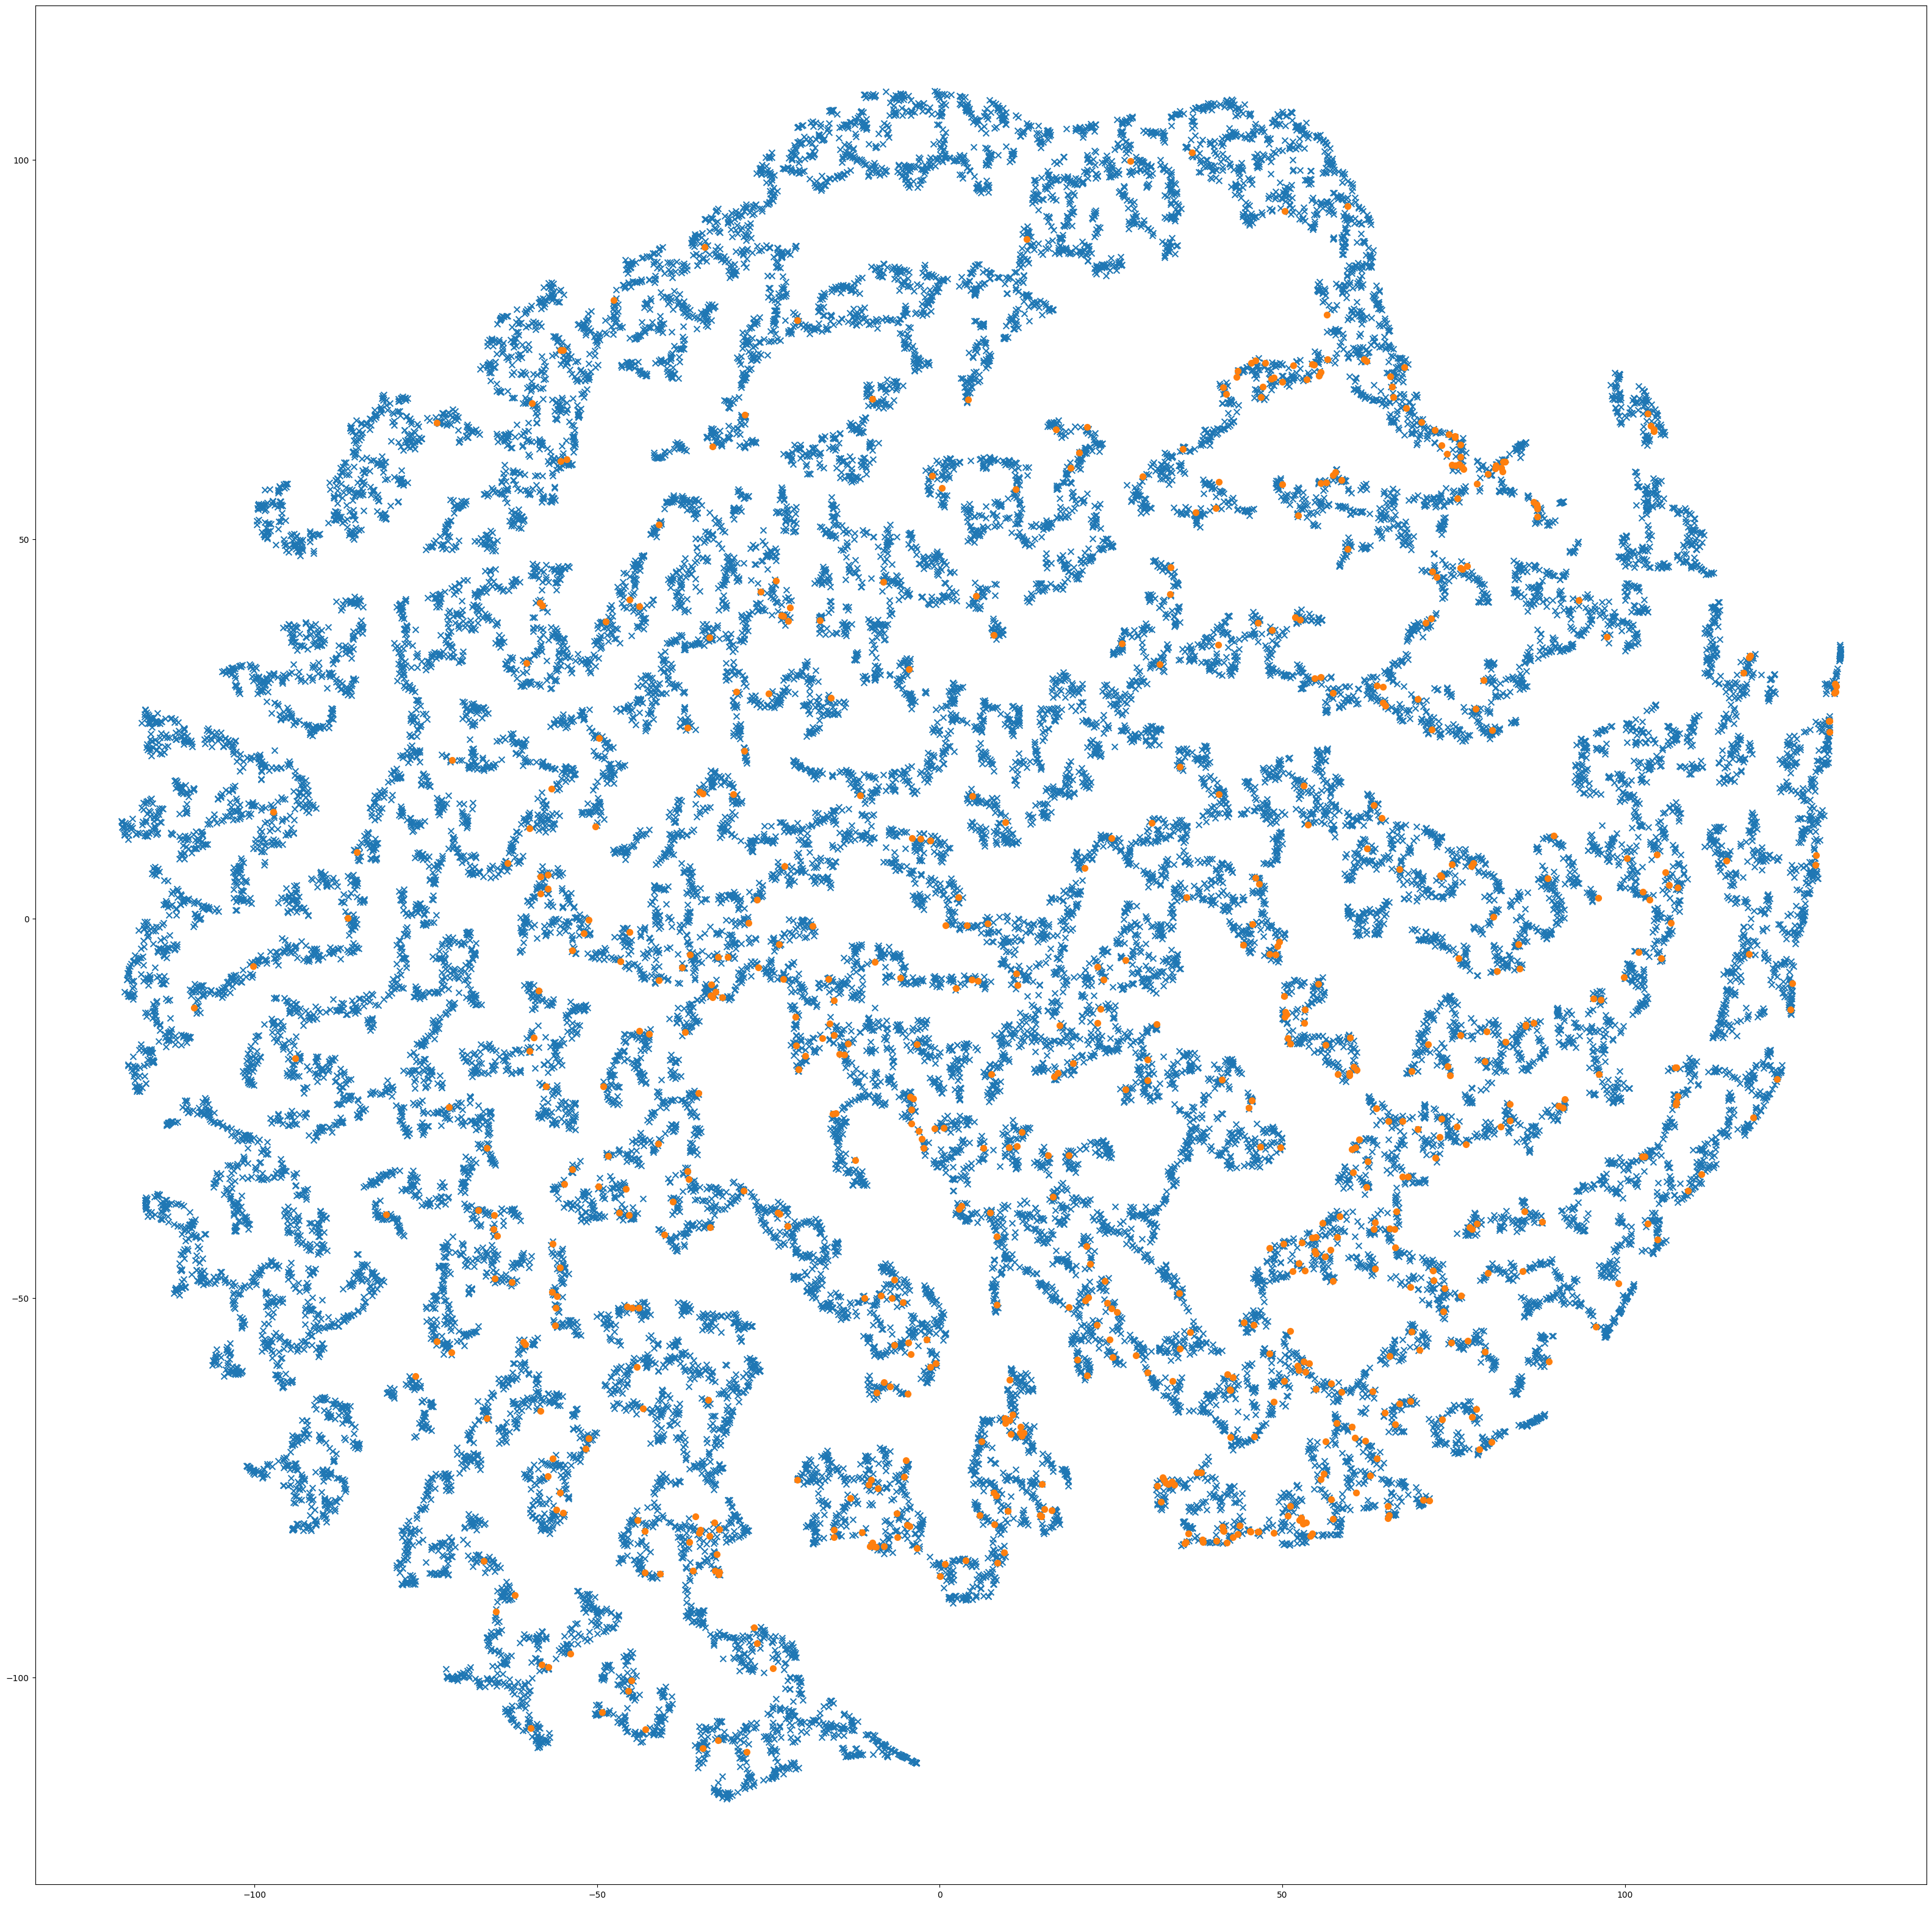

In [8]:
fig = plt.figure()
fig.set_figwidth(40)
fig.set_figheight(40)
plt.scatter(reduced[labels == 1, 0], reduced[labels == 1, 1], marker="x", s=50)
plt.scatter(reduced[labels == 0, 0], reduced[labels == 0, 1], marker="o", s=50)
plt.show()